My approach to this challenge was fairly straightforward. Based on the dataset, I wanted to learn as much as I could about the business and its customers in order to both answer the challenge questions, as well as make inferences about the business. 

I made a few assumptions. First, I assumed that all customers paid the same price for the business's products. Since I had no information about how the business priced its products, the most reasonable assumption I could make was that there was one price for the company's goods. Second, I assumed that user growth in the business was organic and not influenced by special promotions or deals. This was made because I had no additional information about how the business priced its products or whether discounted pricing strategies were employed during the course of the dataset. This is an especially big shortcoming of my analysis, because if I had this information, I would be able to come to a definitive conclusion about why total sales and the number of new customers increased so much in 2013 and 2014. Third, I assumed that regions were equal in size and population. Since I had no information about the characteristics of the region, I had to assume that the regions were roughly uniform in population and other characteristics. This is a shortcoming because additional information about the regions could help explain the differences in total regional sales and the number of transactions that occur in each region. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#Author: Vinay Maruri

In [2]:
#Reading in the csv and converting it into a pandas dataframe for analysis.
transaction_master_df = pd.read_csv(filepath_or_buffer = "data_challenge_transactions.csv", index_col = 0)

In [3]:
transaction_master_df.head()

,transaction_date,sales_amount,join_date,region
user,,,,
665,1/2/13,31.77,2/8/11,E
598,1/2/13,6.20,7/30/09,I
26,1/2/13,35.03,6/18/03,B
1358,1/2/13,32.73,1/2/13,K
671,1/2/13,3.64,5/27/08,E


In [4]:
#Encoding transaction dates into python datetime objects, allowing for easier manipulation of dates.
transaction_master_df['transaction_date_encoded'] = pd.to_datetime(arg = transaction_master_df['transaction_date'])

In [5]:
#Encoding join dates into python datetime objects, allowing for easier manipulation of dates.
transaction_master_df['join_date_encoded'] = pd.to_datetime(arg = transaction_master_df['join_date'])

In [6]:
transaction_master_df['transaction_date_encoded'].sort_values().iloc[0]
#This represents the earliest transaction in the dataset.

Timestamp('2013-01-02 00:00:00')

In [7]:
transaction_master_df['join_date_encoded'].sort_values().iloc[0]
#This represents the earliest first transaction/join date in the dataset.

Timestamp('1999-01-04 00:00:00')

In [8]:
transaction_master_df['transaction_date_encoded'].sort_values(ascending = False).iloc[0]
#This represents the most recent transaction in the dataset.

Timestamp('2016-04-30 00:00:00')

In [9]:
transaction_master_df['join_date_encoded'].sort_values(ascending = False).iloc[0]
#This represents the most recent first transaction/join date in the dataset.

Timestamp('2016-05-30 00:00:00')

In [10]:
regional_average = transaction_master_df.groupby('region').agg({'sales_amount': 'mean'})

In [11]:
regional_average
#This groupby object represents the average sales amount by region. This represents the average transaction amount by region.

,sales_amount
region,
A,42.177599
B,34.400828
C,41.802662
D,39.800609
E,37.252298
F,42.316523
G,32.849350
H,38.008063
I,43.815722


Text(0.5,0,'Region')

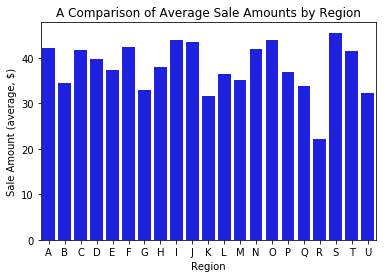

In [12]:
ax = sns.barplot(x = regional_average.index, y = regional_average['sales_amount'], color = 'b')
ax.set_title('A Comparison of Average Sale Amounts by Region')
ax.set_ylabel('Sale Amount (average, $)')
ax.set_xlabel('Region')
#Code to generate a visualization of average sales amount by region. I chose a bar plot because it succinctly shows the 
#different amounts by region.   

In [13]:
regional_max = transaction_master_df.groupby('region').agg({'sales_amount': 'max'})

In [14]:
regional_max
#This groupby object represents the maximum sales amount by region. This represents the largest transaction amount in a region.

,sales_amount
region,
A,356.20
B,660.66
C,411.93
D,268.07
E,318.37
F,404.04
G,610.51
H,409.24
I,763.68


In [15]:
regional_standard_dev = transaction_master_df.groupby('region').agg({'sales_amount': np.std})

In [16]:
regional_standard_dev
#This groupby object represents the standard deviation of sales amounts by region.

,sales_amount
region,
A,36.937578
B,35.035119
C,36.629438
D,34.752884
E,34.327567
F,37.273772
G,35.231298
H,36.157450
I,43.794090


In [17]:
regional_total = transaction_master_df.groupby('region').agg({'sales_amount': 'sum'})

In [18]:
regional_total
#This groupby object represents the total sales amounts by region, aggregated across the time span of the dataset.

,sales_amount
region,
A,92242.41
B,314595.57
C,402141.61
D,106546.23
E,52525.74
F,60004.83
G,173313.17
H,104370.14
I,224424.13


Text(0.5,0,'Region')

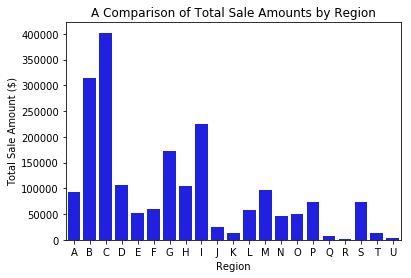

In [19]:
ax = sns.barplot(x = regional_total.index, y = regional_total['sales_amount'], color = 'b')
ax.set_title('A Comparison of Total Sale Amounts by Region')
ax.set_ylabel('Total Sale Amount ($)')
ax.set_xlabel('Region')
#Code to generate a visualization of total sales amount by region. This is aggregated across the time span of the dataset.

In [20]:
transaction_master_df['Transaction Year'] = [y.year for y in transaction_master_df['transaction_date_encoded']]
#Adding a new column to master dataframe representing the year of a given transaction/sale. 

In [21]:
transaction_master_df['Transaction Month'] = [y.month for y in transaction_master_df['transaction_date_encoded']]
#Adding a new column to the master dataframe representing the year of a given transaction/sale.

In [22]:
regional_2013 = transaction_master_df.loc[transaction_master_df['Transaction Year'] == 2013, :].groupby('region').agg({'sales_amount': 'sum'})
regional_2013
#This groupby object represents the total sales amounts by region in 2013.

,sales_amount
region,
A,27605.35
B,103515.18
C,78794.31
D,31824.75
E,17990.21
F,17307.11
G,57112.04
H,29656.06
I,67232.33


Text(0,0.5,'Total Sales Amount ($)')

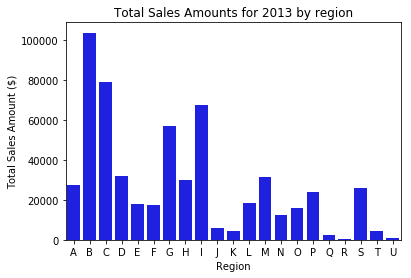

In [23]:
ax = sns.barplot(x = regional_2013.index, y = regional_2013['sales_amount'], color = 'b')
ax.set_title('Total Sales Amounts for 2013 by region')
ax.set_xlabel('Region')
ax.set_ylabel('Total Sales Amount ($)')
# A bar plot of total sales amounts by region in 2013.

In [24]:
regional_2014 = transaction_master_df.loc[transaction_master_df['Transaction Year'] == 2014, :].groupby('region').agg({'sales_amount': 'sum'})
regional_2014
#This groupby object represents the total sales amounts by region in 2014.

,sales_amount
region,
A,29356.57
B,95975.57
C,199673.73
D,37108.09
E,16909.87
F,20610.58
G,54448.27
H,34744.32
I,71654.25


Text(0,0.5,'Total Sales Amount ($)')

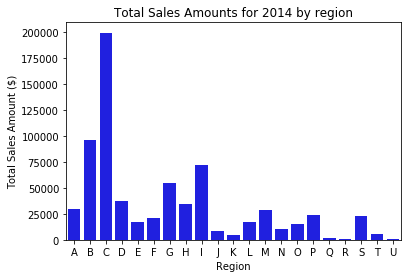

In [25]:
ax = sns.barplot(x = regional_2014.index, y = regional_2014['sales_amount'], color = 'b')
ax.set_title('Total Sales Amounts for 2014 by region')
ax.set_xlabel('Region')
ax.set_ylabel('Total Sales Amount ($)')
# A bar plot of total sales amounts by region in 2014.

In [26]:
regional_2015 = transaction_master_df.loc[transaction_master_df['Transaction Year'] == 2015, :].groupby('region').agg({'sales_amount': 'sum'})
regional_2015
#This groupby object represents the total sales amounts by region in 2015.

,sales_amount
region,
A,26521.67
B,89544.93
C,92825.55
D,28916.40
E,14004.54
F,16618.38
G,49972.24
H,30475.25
I,64395.13


Text(0,0.5,'Total Sales Amount ($)')

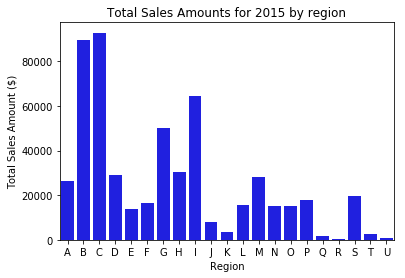

In [27]:
ax = sns.barplot(x = regional_2015.index, y = regional_2015['sales_amount'], color = 'b')
ax.set_title('Total Sales Amounts for 2015 by region')
ax.set_xlabel('Region')
ax.set_ylabel('Total Sales Amount ($)')
# A bar plot of total sales amounts by region in 2015.

In [28]:
regional_2016 = transaction_master_df.loc[transaction_master_df['Transaction Year'] == 2016, :].groupby('region').agg({'sales_amount': 'sum'})
regional_2016
#This groupby object represents the total sales amounts by region in 2016.

,sales_amount
region,
A,8758.82
B,25559.89
C,30848.02
D,8696.99
E,3621.12
F,5468.76
G,11780.62
H,9494.51
I,21142.42


Text(0,0.5,'Total Sales Amount ($)')

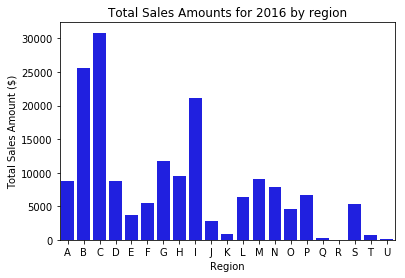

In [29]:
ax = sns.barplot(x = regional_2016.index, y = regional_2016['sales_amount'], color = 'b')
ax.set_title('Total Sales Amounts for 2016 by region')
ax.set_xlabel('Region')
ax.set_ylabel('Total Sales Amount ($)')
# A bar plot of total sales amounts by region in 2016.

In [30]:
region_customers = transaction_master_df.groupby('region').agg({'region': len})
region_customers = region_customers.rename({'region': 'Total Transactions'}, axis = 1)
region_customers
#Creating a groupby object to track how many total customers a region has (aggregrated over time span of dataset).

,Total Transactions
region,
A,2188
B,9147
C,9620
D,2677
E,1410
F,1418
G,5276
H,2746
I,5122


In [31]:
region_customers2013 = transaction_master_df.loc[transaction_master_df['Transaction Year'] == 2013, :].groupby('region').agg({'region': len})
region_customers2013 = region_customers2013.rename({'region': 'Total # of Transactions'}, axis = 1)

In [32]:
region_customers2013
#A groupby object representing the total number of transactions by region in 2013.

,Total # of Transactions
region,
A,698
B,3057
C,2346
D,847
E,530
F,457
G,1957
H,880
I,1644


In [33]:
region_customers2014 = transaction_master_df.loc[transaction_master_df['Transaction Year'] == 2014, :].groupby('region').agg({'region': len})
region_customers2014 = region_customers2014.rename({'region': 'Total # of Transactions'}, axis = 1)
region_customers2014
#A groupby object representing the total number of transactions by region in 2014.

,Total # of Transactions
region,
A,674
B,2853
C,4294
D,965
E,443
F,489
G,1740
H,915
I,1676


In [34]:
region_customers2015 = transaction_master_df.loc[transaction_master_df['Transaction Year'] == 2015, :].groupby('region').agg({'region': len})
region_customers2015 = region_customers2015.rename({'region': 'Total # of Transactions'}, axis = 1)
region_customers2015
#A groupby object representing the total number of transactions by region in 2015.

,Total # of Transactions
region,
A,608
B,2506
C,2234
D,669
E,335
F,351
G,1268
H,712
I,1367


In [35]:
region_customers2016 = transaction_master_df.loc[transaction_master_df['Transaction Year'] == 2016, :].groupby('region').agg({'region': len})
region_customers2016 = region_customers2016.rename({'region': 'Total # of Transactions'}, axis = 1)
region_customers2016
#A groupby object representing the total number of transactions by region in 2016.

,Total # of Transactions
region,
A,208
B,731
C,746
D,196
E,102
F,121
G,311
H,239
I,435


In [36]:
total_sales = transaction_master_df.groupby('transaction_date_encoded').agg({'sales_amount': 'sum'})

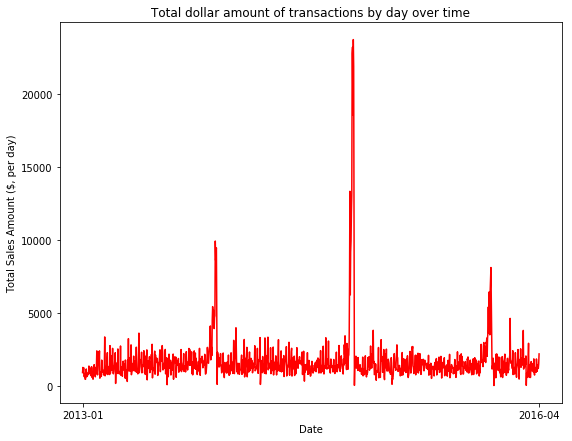

In [37]:
plt.figure(figsize = (9,7))
ax = sns.lineplot(x = total_sales.index, y = total_sales['sales_amount'], color = 'r')
ax.set_title('Total dollar amount of transactions by day over time')
ax.set_xlabel('Date')
ax.set_ylabel('Total Sales Amount ($, per day)')
ax.set_xticks(ticks = ['2016-04-30', '2013-01-02'])
#A line plot of the total sales (transaction) amount on a given day over time. 

In [38]:
total_sales_by_year = transaction_master_df.groupby('Transaction Year').agg({'sales_amount': 'sum'})

Text(0,0.5,'Total Sales Amount ($, per year)')

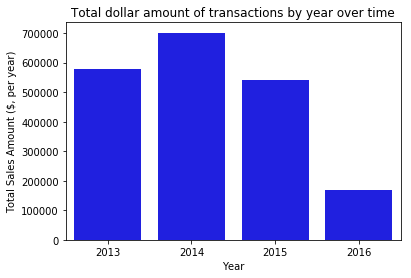

In [39]:
ax = sns.barplot(x = total_sales_by_year.index, y = total_sales_by_year['sales_amount'], color = 'b')
ax.set_title('Total dollar amount of transactions by year over time')
ax.set_xlabel('Year')
ax.set_ylabel('Total Sales Amount ($, per year)')
#A bar plot of total sales (transaction) amount per year over time. 

In [40]:
total_sales_by_month_agg = transaction_master_df.groupby('Transaction Month').agg({'sales_amount': 'sum'})

In [41]:
total_sales_by_month_agg
#This object represents total sales by month aggregated over time.

,sales_amount
Transaction Month,
1,139729.31
2,164426.63
3,178418.69
4,158040.83
5,137347.17
6,134318.30
7,137408.40
8,132452.44
9,118869.05


Text(0,0.5,'Total Sales Amount ($)')

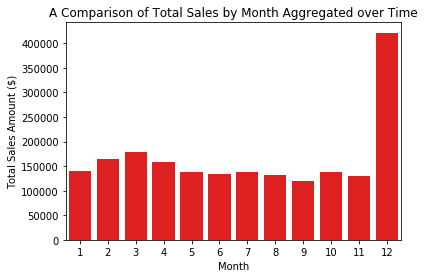

In [42]:
ax = sns.barplot(x = total_sales_by_month_agg.index, y = total_sales_by_month_agg['sales_amount'], color = 'r')
ax.set_title('A Comparison of Total Sales by Month Aggregated over Time')
ax.set_xlabel('Month')
ax.set_ylabel('Total Sales Amount ($)')
# A bar plot of the total sales by month aggregated over time.
#Note: 1 = January, 2 = February, 3 = March, ...., 12 = December

In [43]:
total_sales_by_month2013_agg = transaction_master_df.loc[transaction_master_df['Transaction Year'] == 2013, :].groupby('Transaction Month').agg({'sales_amount': 'sum'})

In [44]:
total_sales_by_month2013_agg
#This object represents total sales by month in 2013.

,sales_amount
Transaction Month,
1,25390.06
2,33633.71
3,43549.60
4,36076.65
5,42941.87
6,47022.96
7,49856.60
8,47570.26
9,43183.73


Text(0,0.5,'Total Sales Amount ($)')

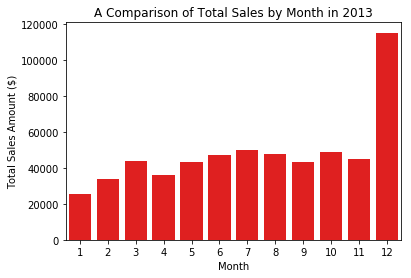

In [45]:
ax = sns.barplot(x = total_sales_by_month2013_agg.index, y = total_sales_by_month2013_agg['sales_amount'], color = 'r')
ax.set_title('A Comparison of Total Sales by Month in 2013')
ax.set_xlabel('Month')
ax.set_ylabel('Total Sales Amount ($)')
# A bar plot of the total sales by month in 2013.

In [46]:
total_sales_by_month2014_agg = transaction_master_df.loc[transaction_master_df['Transaction Year'] == 2014, :].groupby('Transaction Month').agg({'sales_amount': 'sum'})

In [47]:
total_sales_by_month2014_agg
#This object represents total sales by month in 2014.

,sales_amount
Transaction Month,
1,38584.35
2,42711.81
3,45828.92
4,43867.77
5,49446.95
6,44706.90
7,47423.55
8,44657.79
9,38981.45


Text(0,0.5,'Total Sales Amount ($)')

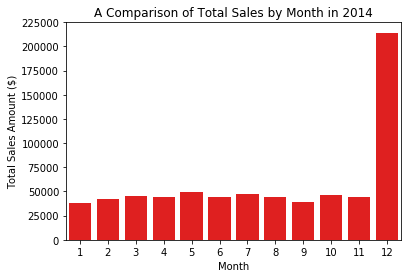

In [48]:
ax = sns.barplot(x = total_sales_by_month2014_agg.index, y = total_sales_by_month2014_agg['sales_amount'], color = 'r')
ax.set_title('A Comparison of Total Sales by Month in 2014')
ax.set_xlabel('Month')
ax.set_ylabel('Total Sales Amount ($)')
# A bar plot of the total sales by month in 2014.

In [49]:
total_sales_by_month2015_agg = transaction_master_df.loc[transaction_master_df['Transaction Year'] == 2015, :].groupby('Transaction Month').agg({'sales_amount': 'sum'})

In [50]:
total_sales_by_month2015_agg
#This object represents total sales by month in 2015.

,sales_amount
Transaction Month,
1,35393.70
2,43838.22
3,42864.99
4,38840.12
5,44958.35
6,42588.44
7,40128.25
8,40224.39
9,36703.87


Text(0,0.5,'Total Sales Amount ($)')

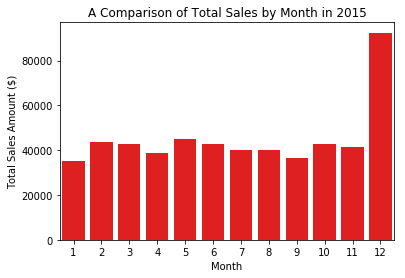

In [51]:
ax = sns.barplot(x = total_sales_by_month2015_agg.index, y = total_sales_by_month2015_agg['sales_amount'], color = 'r')
ax.set_title('A Comparison of Total Sales by Month in 2015')
ax.set_xlabel('Month')
ax.set_ylabel('Total Sales Amount ($)')
# A bar plot of the total sales by month in 2015.

In [52]:
total_sales_by_month2016_agg = transaction_master_df.loc[transaction_master_df['Transaction Year'] == 2016, :].groupby('Transaction Month').agg({'sales_amount': 'sum'})

In [53]:
total_sales_by_month2016_agg
#This object represents total sales by month in 2016.

,sales_amount
Transaction Month,
1,40361.20
2,44242.89
3,46175.18
4,39256.29


In [54]:
transaction_master_df['Join Year'] = [y.year for y in transaction_master_df['join_date_encoded']]
#Adding a new column to yield the year for first purchase (joining year) to the master dataframe. 

In [55]:
total_sales_by_joinyear = transaction_master_df.groupby('Join Year').agg({'sales_amount': 'sum'})

In [56]:
total_sales_by_joinyear
# This groupby object represents the total sales amount (aggregated over time span of dataset) by join year. For example, 
# customers that joined in 1999 are counted as join year 1999.0. 
# Note: 1999.0 is equal to the year 1999 (encoding issue, no effect on analysis)

,sales_amount
Join Year,
1999.0,12239.84
2000.0,4051.94
2001.0,35205.47
2002.0,16864.37
2003.0,33901.73
2004.0,34207.66
2005.0,24308.43
2006.0,34695.92
2007.0,41400.17


Text(0,0.5,'Total Sales Amount ($, aggregated)')

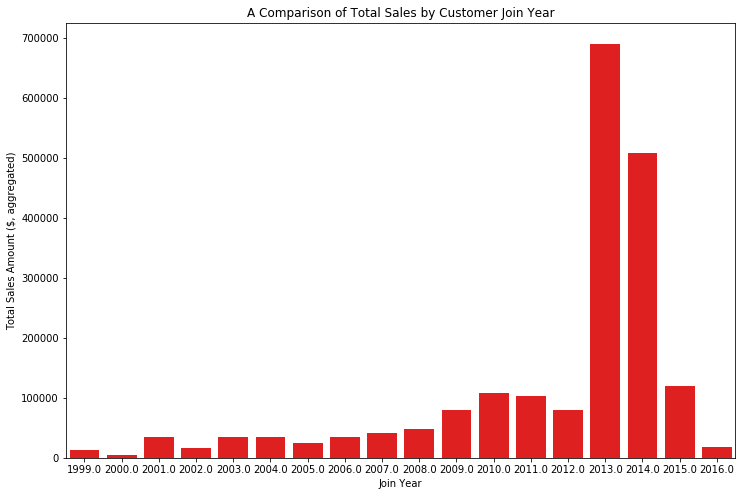

In [57]:
plt.figure(figsize = (12,8))
ax = sns.barplot(x = total_sales_by_joinyear.index, y = total_sales_by_joinyear['sales_amount'], color = 'r')
ax.set_title('A Comparison of Total Sales by Customer Join Year')
ax.set_xlabel('Join Year')
ax.set_ylabel('Total Sales Amount ($, aggregated)')
# A bar plot of the Total Sales Amount (over time span of dataset) by Join Year. 
# Customers who joined in 1999 are counted as join year 1999.0, customers who joined in 2000 are counted as join year 2000.0 
# and so on. 


In [58]:
average_transactionsize_by_joinyear = transaction_master_df.groupby('Join Year').agg({'sales_amount': 'mean'})

In [59]:
average_transactionsize_by_joinyear
#This groupby object represents the average customer transaction size by join year. (Transactions are aggregated over time)

,sales_amount
Join Year,
1999.0,32.295092
2000.0,40.928687
2001.0,34.481361
2002.0,32.746350
2003.0,41.699545
2004.0,37.385421
2005.0,36.554030
2006.0,40.915000
2007.0,33.962404


Text(0,0.5,'Average Transaction Size ($)')

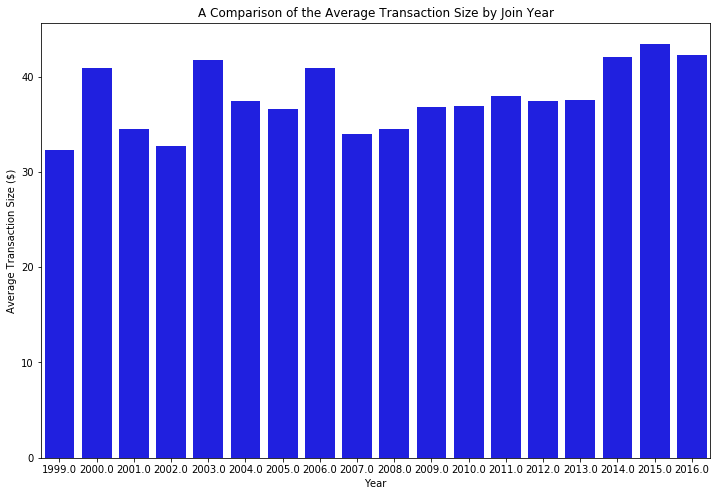

In [60]:
plt.figure(figsize = (12,8))
ax = sns.barplot(x = average_transactionsize_by_joinyear.index, y = average_transactionsize_by_joinyear['sales_amount'], color = 'b')
ax.set_title('A Comparison of the Average Transaction Size by Join Year')
ax.set_xlabel('Year')
ax.set_ylabel('Average Transaction Size ($)')
# A bar plot of the average customer transaction size by join year. (Transactions are aggregated over time)

In [61]:
new_customers = transaction_master_df.groupby('Join Year').agg({'Join Year': len})

In [62]:
new_customers = new_customers.rename({'Join Year': 'Total'}, axis = 1)
#This groupby object represents the total number of customers who joined the business (defined as making their first transaction)
#in a given year.

In [63]:
new_customers

,Total
Join Year,
1999.0,379.0
2000.0,99.0
2001.0,1021.0
2002.0,515.0
2003.0,814.0
2004.0,915.0
2005.0,665.0
2006.0,848.0
2007.0,1219.0


Text(0,0.5,'Number of New Customers (total)')

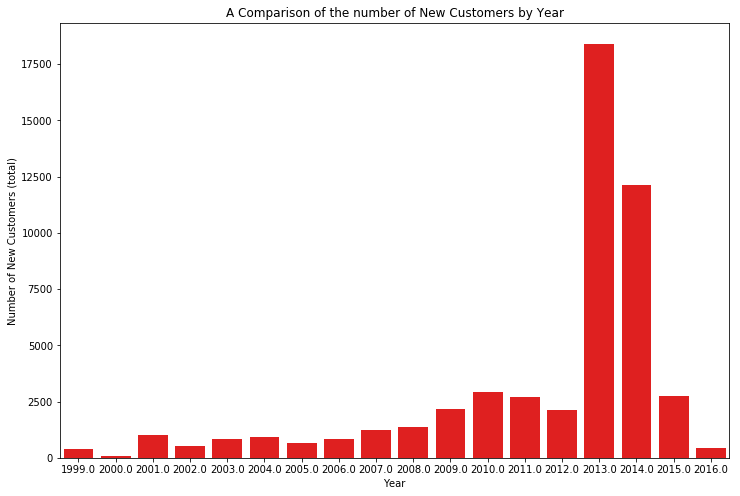

In [64]:
plt.figure(figsize = (12,8))
ax = sns.barplot(x = new_customers.index, y = new_customers['Total'], color = 'r')
ax.set_title('A Comparison of the number of New Customers by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of New Customers (total)')
# A bar plot of the number of new customers who joined the business (made their first transaction) by year.